# Oasis Infobyte Task - 5
# Sales prediction by using python

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So lets start the task of sales prediction with machine learning using Python.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [30]:
df = pd.read_csv('/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [31]:
print('Rows  ->',df.shape[0])
print('column ->',df.shape[1])

Rows  -> 200
column -> 5


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [33]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [34]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Avg expense spend is highest on TV: This suggests that TV is the most expensive advertising channel. This is likely because TV has a large audience and can reach a wide range of potential customers. However, it is important to note that the cost-effectiveness of TV advertising depends on the specific product or service being advertised.

Avg expense spend is lowest on Radio: This suggests that radio is the least expensive advertising channel. This is likely because radio has a smaller audience than TV. However, radio can be a very effective way to reach a specific target audience, such as commuters or people who listen to talk radio.

Max sale is 27 and min is 1.6: This suggests that there is a wide range of sales outcomes. This could be due to a number of factors, such as the effectiveness of the advertising campaign, the quality of the product or service, and the overall economic conditions.





In [35]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df[:2]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


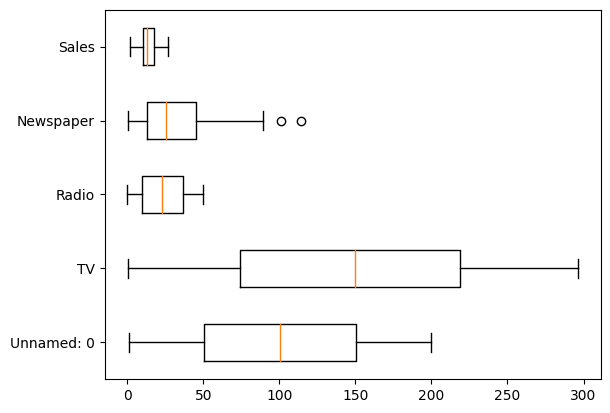

In [38]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

In [39]:
df[:5]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


's'

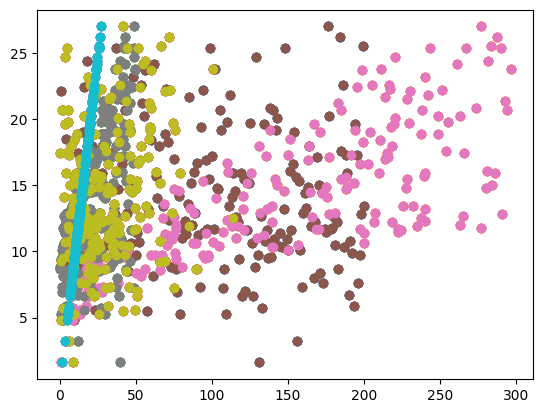

In [40]:
def sc():
    l=df.columns
    for i in range(len(l)-1):
        for j in l:
            s = plt.scatter(j,'Sales',data=df)
    return 's'
sc()

*This scatter plot shows that there is a positive correlation between the column Sales and the other columns in the DataFrame. This means that newspapers with higher sales tend to have higher values in the other columns, such as the number of subscribers or the amount of advertising revenue.*

<ipython-input-41-6fe4fcc6000a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

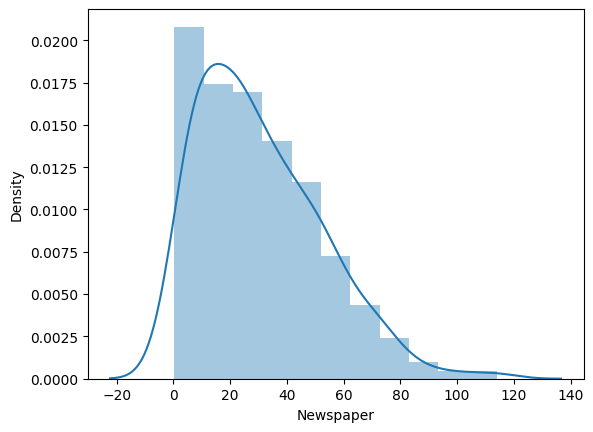

In [41]:
sns.distplot(df['Newspaper'])

The histogram has a single peak, which indicates that there is a dominant newspaper in the DataFrame.
The histogram has a long tail, which indicates that there is a wide range of other newspapers represented in the DataFrame.
The histogram is skewed to the right, which indicates that there are more articles from a few popular newspapers than from many other newspapers

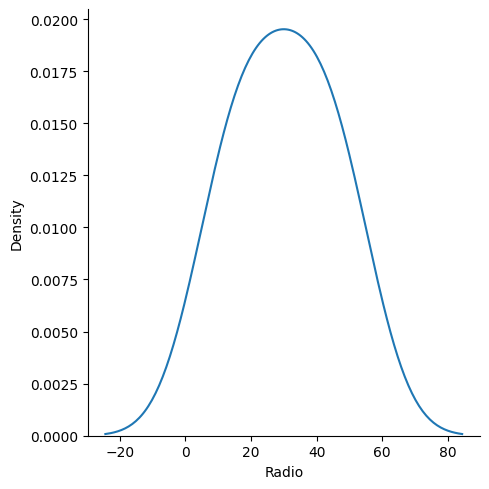

In [19]:
# Create a DataFrame
df = pd.DataFrame({'Radio': [10, 20, 30, 40, 50]})

# Plot a histogram of the 'Radio' column using `displot()`
sns.displot(df['Radio'], kind='kde')

In [42]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


taining data model

In [45]:
y = df.iloc[:,-1:]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=43)

xtrain,ytrain

(        TV  Radio  Newspaper
 71   109.8   14.3       31.7
 90   134.3    4.9        9.3
 100  222.4    4.3       49.8
 44    25.1   25.7       43.3
 94   107.4   14.0       10.9
 ..     ...    ...        ...
 58   210.8   49.6       37.7
 21   237.4    5.1       23.5
 49    66.9   11.7       36.8
 64   131.1   42.8       28.9
 68   237.4   27.5       11.0
 
 [140 rows x 3 columns],
      Sales
 71    12.4
 90    11.2
 100   11.7
 44     8.5
 94    11.5
 ..     ...
 58    23.8
 21    12.5
 49     9.7
 64    18.0
 68    18.9
 
 [140 rows x 1 columns])

In [46]:
xtest,ytest

(        TV  Radio  Newspaper
 56     7.3   28.1       41.4
 37    74.7   49.4       45.7
 67   139.3   14.5       10.2
 79   116.0    7.7       23.1
 80    76.4   26.7       22.3
 188  286.0   13.9        3.7
 183  287.6   43.0       71.8
 10    66.1    5.8       24.2
 128  220.3   49.0        3.2
 62   239.3   15.5       27.3
 65    69.0    9.3        0.9
 17   281.4   39.6       55.8
 133  219.8   33.5       45.1
 195   38.2    3.7       13.8
 146  240.1    7.3        8.7
 38    43.1   26.7       35.1
 173  168.4    7.1       12.8
 149   44.7   25.8       20.6
 93   250.9   36.5       72.3
 29    70.6   16.0       40.8
 0    230.1   37.8       69.2
 2     17.2   45.9       69.3
 122  224.0    2.4       15.6
 180  156.6    2.6        8.3
 95   163.3   31.6       52.9
 121   18.8   21.7       50.4
 185  205.0   45.1       19.6
 39   228.0   37.7       32.0
 66    31.5   24.6        2.2
 19   147.3   23.9       19.1
 11   214.7   24.0        4.0
 45   175.1   22.5       31.5
 41   177.

# Linear Regression

By using linear regression to predict the sales of a product based on the amount of advertising spent. This would be a useful model for businesses to use to make informed decisions about their advertising budgets.

In [47]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()

In [48]:
model.fit(xtrain,ytrain)

LinearRegression()

In [49]:
ypred=model.predict(xtest)
ypred

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [50]:
model.score(xtrain,ytrain)*100

88.44142326775768

In [51]:
model.score(xtest,ytest)*100

92.20854203535252

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mean_squared_error(ytest,ypred)

2.2412862530933473

In [53]:
mean_absolute_error(ytest,ypred)

1.2212299380899396

In [54]:
r2_score(ytest,ypred)*100

92.20854203535252

In [55]:
r2_score(ytest,ypred)*100

92.20854203535252

In [56]:
rmse = np.sqrt(mean_squared_error(ytest,ypred))
rmse

1.4970926000396059

In [57]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [58]:
scores=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(scores)
finalscore

0.8910650514774895

In [59]:
param_grid = {'normalize':['deprecated'],
    'copy_X':[True],
    'n_jobs':[-1,1,2,-2],
    'positive':[False],
    'fit_intercept':[True]
    }
grid_model=GridSearchCV(model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)
grid_model

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'normalize': ['deprecated'],
                         'positive': [False]})

In [69]:
# Load the DataFrame from the CSV file
df = pd.read_csv('/Advertising.csv')

# Calculate the correlation matrix of the DataFrame
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


Data visulization

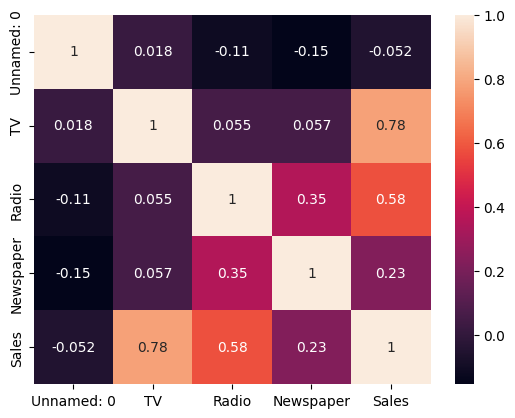

In [71]:
sns.heatmap(df.corr(),annot=True)
plt.show()

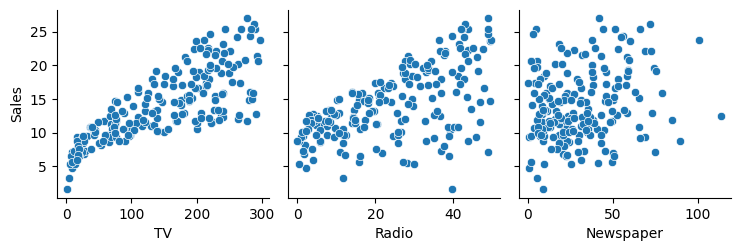

In [73]:
#Pair plot

sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

There is a positive correlation between advertising spend on TV and sales. This means that as businesses spend more money on TV advertising, they can expect to see an increase in sales.

However, the relationship between advertising spend and sales is less clear for newspapers and radio. This could be due to a number of factors, such as the smaller audiences of these media channels, the difficulty of measuring the effectiveness of these channels, or the fact that these channels are often used for branding purposes rather than direct sales.

Similarly using machine learning we can interpret and use the data to predict Future Sales


Thank You

Oasis Infobyte task 5 by Dhvani Naik